In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from time import perf_counter

**SVD-сжатие**

In [8]:
# Функция для выполнения сингулярного разложения (SVD)
def perform_svd(image, k):
    U, S, V = np.linalg.svd(image, full_matrices=False)
    return U[:, :k], np.diag(S[:k]), V[:k, :]

# Функция для подсчета ошибки сжатия
def compression_error(S, k):
    sigma = np.diag(S)
    return np.sqrt(np.sum(sigma[k:]**2))

# Функция для сжатия изображения с использованием SVD
def compress_image(image, k):
    U, S, V = perform_svd(image, k)
    compressed_image = np.dot(U, np.dot(S, V))
    return compressed_image

# Функция для отображения изображения до и после сжатия
def plot_images(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

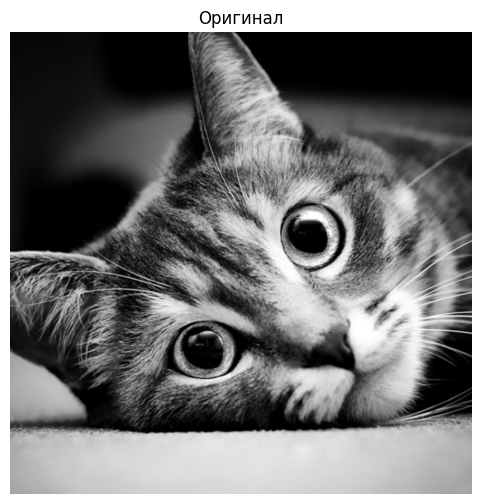

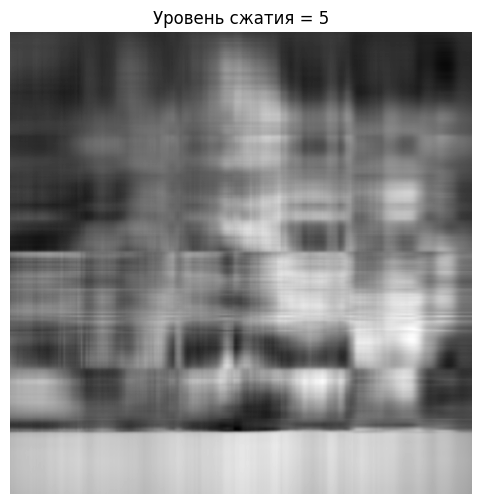

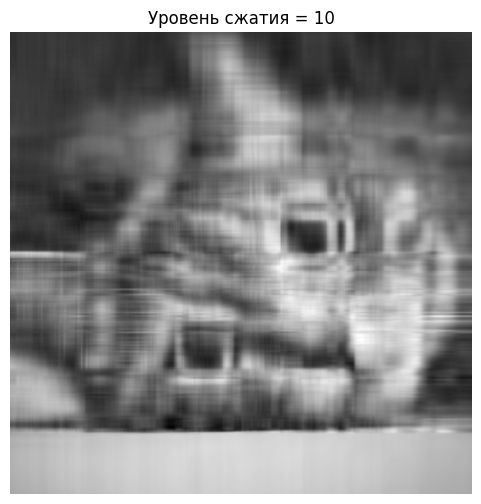

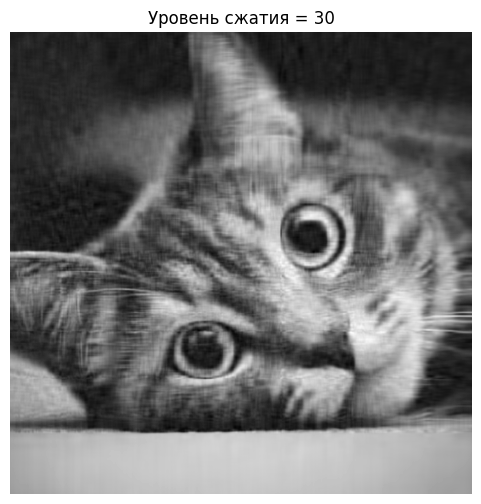

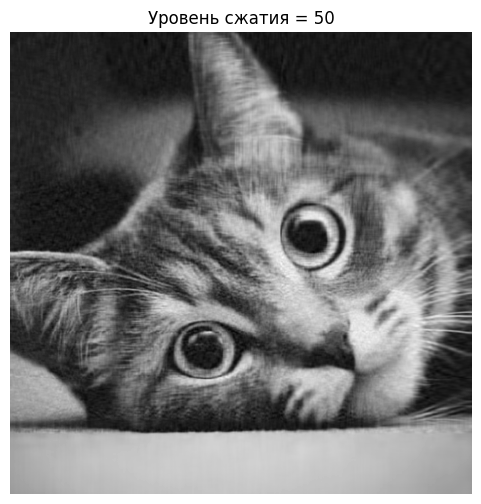

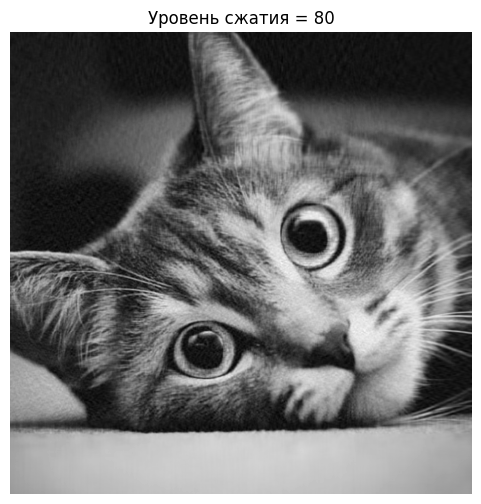

In [9]:
# Загрузка изображения
path = 'SVD.jpg'
img = np.array(Image.open(path).convert('L'))

# Уровни сжатия
ranks = [5, 10, 30, 50, 80]

plot_images(img, 'Оригинал')

# Сжатие изображения и отображение результатов
for rank in ranks:
    compressed_img = compress_image(img, rank)
    plot_images(compressed_img, f'Уровень сжатия = {rank}')

**Сравнение времён**

In [31]:
# Создание матрицы A
n = 2048
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sin(i + j) + 2

vec = np.random.rand(n)

# Вычисление времени выполнения операции матричного умножения с помощью np.dot()
start_time1 = perf_counter()
res = np.dot(A, vec)
end_time1 = perf_counter()

# Сингулярное разложение матрицы A
U, S, V = perform_svd(A, 3)

# Вычисление времени выполнения операции матричного умножения с использованием сингулярного разложения
start_time2 = perf_counter()
res2 = np.dot(U, np.dot(S, np.dot(V, vec)))
end_time2 = perf_counter()

print("Результат1:", res)
print("Время выполнения (без SVD):", end_time1 - start_time1)
print("Результат2:", res2)
print("Время выполнения (SVD):", end_time2 - start_time2)

Результат1: [2022.90935601 2034.63916714 2046.4500332  ... 2047.67736319 2037.27453717
 2024.52981903]
Время выполнения (без SVD): 0.0016049998812377453
Результат2: [2022.90935601 2034.63916714 2046.4500332  ... 2047.67736319 2037.27453717
 2024.52981903]
Время выполнения (SVD): 0.0001925998367369175


**e-округление**

In [15]:
# Функция для определения оптимального значения k для заданной ошибки
def find_optimal_k(S, err):
    sigma = np.diag(S)
    sigma_normalized = sigma / sigma[0]
    k = 0
    cumulative_err = sigma[-1]**2
    k_index = -1
    while np.sqrt(cumulative_err) < err:
        k += 1
        k_index -= 1
        cumulative_err += sigma[k_index]**2
    return S.shape[0] - k

1


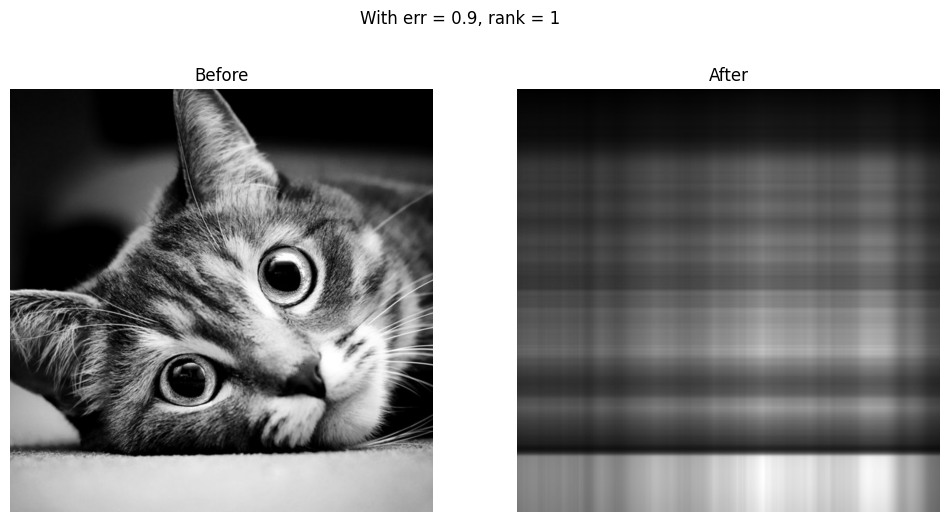

1


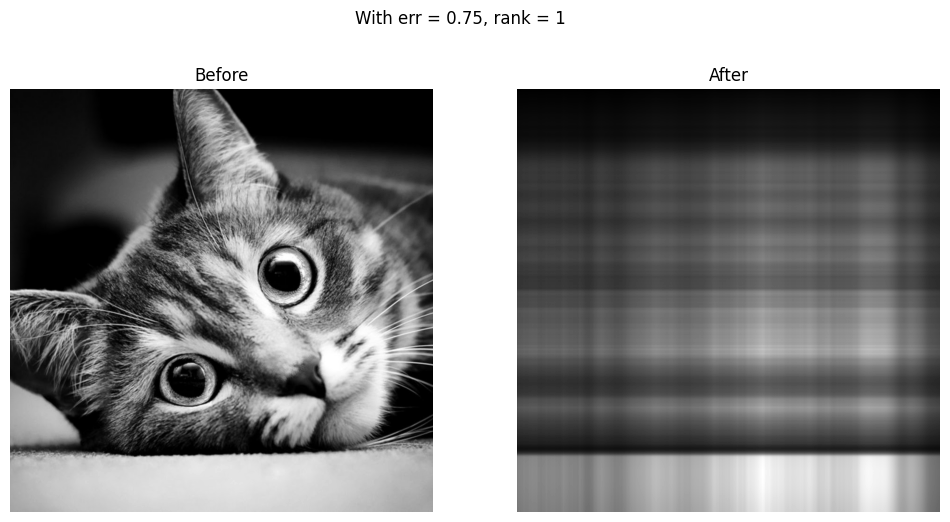

1


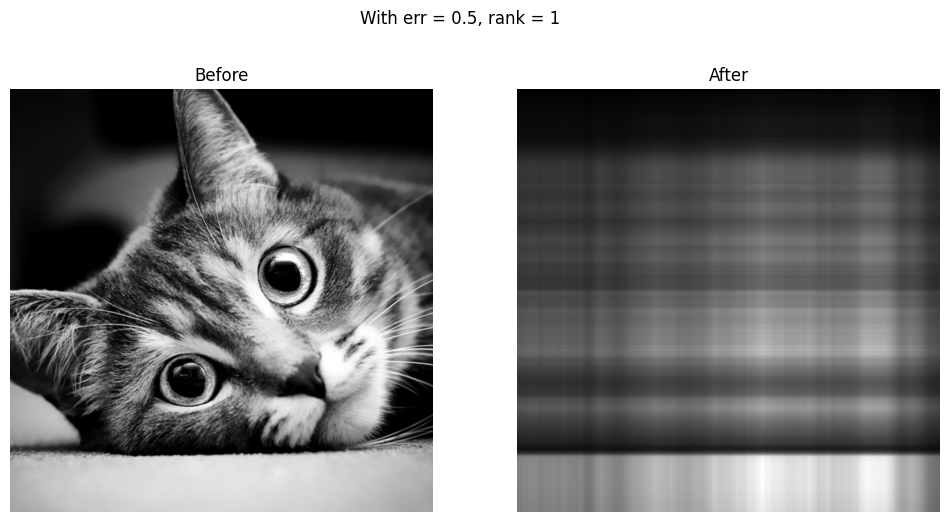

50


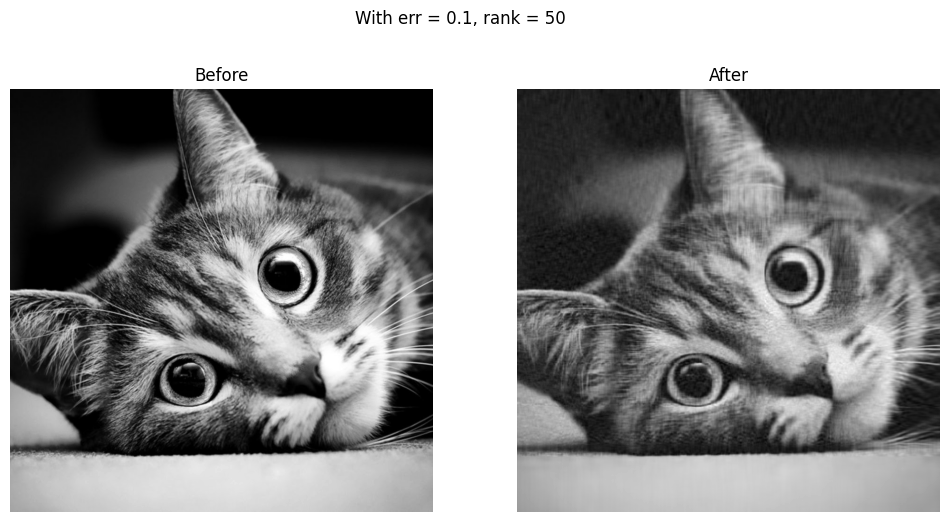

354


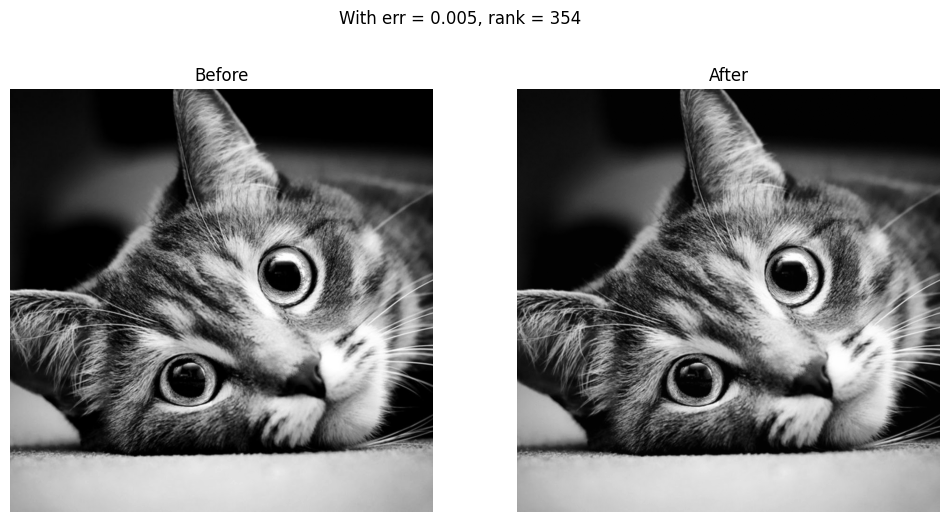

802


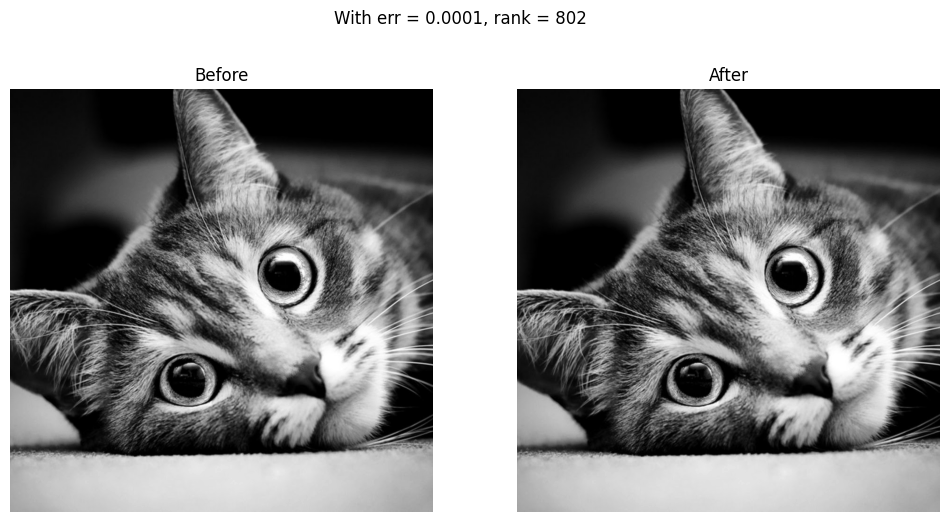

In [19]:
# Оценка сжатия изображения для различных уровней ошибки
img = np.array(Image.open(path).convert('L'))
errs = [0.9, 0.75, 0.5, 0.1, 0.005, 0.0001]

U, S, V = perform_svd(img, img.shape[0])

for e in errs:
    r = best_k(S, e)
    print(r)
    compressed_img = SVD_compressed(img, r)
    plot_img(img, compressed_img, f'With err = {e}, rank = {r}')